# Computational Assessment

Name: Satyam Raheja

Registeration Id: 20BPHY038

Subject: Statistical Mechanics Lab

In [49]:
import numpy as np
import math
from tqdm import tqdm # to show progress bar
import matplotlib.pyplot as plt
%matplotlib inline

## Initialisation

In [50]:
rcut = 3.0  ##### Cut-off distance.
rcutsquare=rcut**2
g3=1/(rcut**3)
potcut = 4.*g3*(g3-1) ##### Term to be subtracted from pair potential energy
number_x = 4
number_y=5
Natoms = number_x*number_y  # No. of atoms
L = 10 # Length of a side of the square containing the gas. #Assumed point particle
rho = Natoms/(L**2) ### Number Density
T0 = 100. # Natural temperature scale, T0 = epsilon/Kb.
T = 200.   # Temperature in Kelvin
dt = 1E-2  # Time step for Verlet Algorithm #1E-2=0.01

## Defining acceleration and potential energy function

In [51]:
##### Function to compute acceleration for a pair of atoms. 
## r12 is relative displacement of atoms.

def acceleration(r12): 
    r12square = np.dot(r12,r12)
    f2 = 1./r12square
    f3 = f2**(1.5)
    acc = 24.*f2*f3*(f3-0.5)*r12
    return acc
#### Function to compute potential energy for the system of particles. `pos' is the array of position vectors.
def potentialenergy(pos):
    potential = 0.
    for i in range(Natoms-1):
        for j in range(i+1,Natoms):
            rij = pos[i] - pos[j] ## Relative position vector of the pair
            for l in range(2):#2 for x and y coord ### Calculating the correct separation between particles because of periodic boundary conditions.
                if abs(rij[l])>0.5*L: 
                    rij[l] -= L*np.sign(rij[l]) # sign will give  -1 or +1
            rijsquare = np.dot(rij,rij)
            if rijsquare < rcutsquare: # Imposing interaction cut-off
                f2 = 1./rijsquare
                f3 = f2**(1.5)
                potential += 4.*f3*(f3-1.) - potcut # to make potential energy continuous at rcutoff
    return potential


## Giving random position to particles with same initial speed moving in different directions

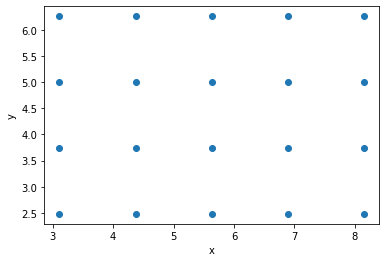

In [84]:
# Atoms are arranged initially in a square lattice 
# configuration with spacing between neighbors equal 
# to equilibrium separation.

equilib_sep = math.pow(2.,1./3.)  ## Equilibrium separation of atoms
wall_spacing_x = (L-(number_x-1)*equilib_sep)/2.## Distance between the walls and the initial array of atoms.
wall_spacing_y = (L-(number_y-1)*equilib_sep)/2.
# Entire L is divided into 2 wall seperation and Sum of distance b/w atoms along x or y
poslist = []  # List for positions of atoms
vlist = []   # List for velocities

################  Initialize positions and velocities ##############################################
x, y = wall_spacing_x, wall_spacing_y

for i in range(number_x):
    for j in range(number_y):
        xi, yi = x + equilib_sep*j, y + equilib_sep*i
        poslist.append((xi,yi))

####### Initially, all particles have the same speed but random velocity directions. ################
v0 = math.sqrt(2.*T/T0) # T/T0 is dimentionless kinetic energy or temp 

for i in range(Natoms):
    phi = 2*np.pi*np.random.random()
    vx = v0*np.cos(phi)
    vy = v0*np.sin(phi)
    vlist.append((vx,vy))
###################################################################################################

pos = np.array(poslist)  ### Converts lists to numpy arrays
pos_initial=np.copy(pos)
v = np.array(vlist) ## Scaled velocity
V_cm = np.sum(v, axis = 0)/Natoms ## Correcting for CM velocity. to make total momentum to be 0
V = np.array([V_cm]*Natoms)
v -= V
v_initial=v.copy()
pos=np.array(pos)
plt.scatter(pos[:,0],pos[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [53]:
time = 0. # Initial time.
t_final = 500. # Time upto which simulation is carried out.
potential_energy = potentialenergy(pos)
kinetic_energy = 0.5*sum(np.square(v).sum(axis=1))
K_initial=kinetic_energy.copy()
energy = kinetic_energy + potential_energy
Time_List = [time]
Energy_List = [energy]
PotentialEnergy_List = [potential_energy]
KineticEnergy_List = [kinetic_energy]
iterations = int(t_final/dt) # Number of iterations of the Verlet Algorithm.

# Verlet Algorithm to calculate dimensionless speed at later time

In [54]:
##################################### The Verlet Algorithm Loop ###################################
for step in tqdm(range(iterations)):
    pos += v*dt/2. ## Updating positions.
    for i in range(Natoms): ## Imposing periodic boundary conditions.
        for j in range(2):
            if pos[i][j] > L: pos[i][j] -= L
            elif pos[i][j] < 0: pos[i][j] += L
    accel = np.zeros((Natoms,2)) ## Initialising acceleration array.
    for i in range(Natoms-1):
        for j in range(i+1,Natoms):
            rij = pos[i] - pos[j]
            for l in range(2):  ### Calculating the correct separation between particles.
                if abs(rij[l])>0.5*L: rij[l] -= L*np.sign(rij[l])
            if np.dot(rij,rij) < rcutsquare:
                acc = acceleration(rij) # Computing acceleration for a pair of particles.
                accel[i] += acc
                accel[j] -= acc # Newton's 3rd law
    v += accel*dt  ## Updating velocities.
    pos += v*dt/2. ## Final updating of positions.
    for i in range(Natoms): ## Imposing periodic boundary conditions.
        for j in range(2):
            if pos[i][j] > L: pos[i][j] -= L
            elif pos[i][j] < 0: pos[i][j] += L
    potential_energy = potentialenergy(pos)
    kinetic_energy = 0.5*sum(np.square(v).sum(axis=1))
    Speed_list=np.square(v).sum(axis=1)
    energy = kinetic_energy + potential_energy
    Energy_List.append(energy)
    PotentialEnergy_List.append(potential_energy)
    KineticEnergy_List.append(kinetic_energy)
    time += dt
    Time_List.append(time)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:58<00:00, 280.46it/s]


In [56]:
print("Speed of each particle is",Speed_list)

Speed of each particle is [9.32994372 0.08372373 2.91036065 1.36830881 0.97216628 1.74637361
 0.40132733 0.0594229  0.17361195 1.88466432 0.62358529 0.84499646
 0.19941848 4.10292789 1.36104771 1.26628075 0.24015217 5.36861765
 1.80827817 7.79723065]


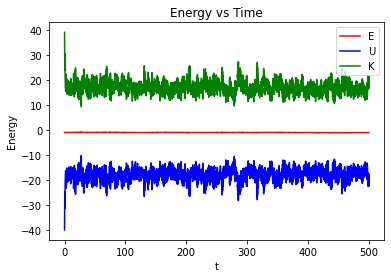

In [57]:
plt.xlabel('t') # Label for the x-axis
plt.ylabel('Energy') # Label for the y-axis
plt.title('Energy vs Time') # Title of plot
plt.plot(Time_List,Energy_List, color = 'r', label="E") 
plt.plot(Time_List,PotentialEnergy_List, color = 'b', label="U")
plt.plot(Time_List,KineticEnergy_List, color = 'g', label="K")
plt.legend();

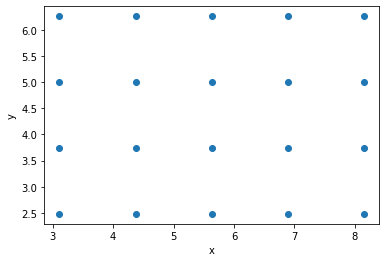

In [83]:
plt.scatter(pos[:,0],pos[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Using above calculated speed as initial speed of particles

## Setting thermostat for 1/3rd interval of time, evolving through energy conservation in later 2/3rd interval

## Collecting speed data only in last 1/3rd of time interval

In [68]:
rcut = 3.0  ##### Cut-off distance.
rcutsquare=rcut**2
g3=1/(rcut**3)
potcut = 4.*g3*(g3-1) ##### Term to be subtracted from pair potential energy
number_x = 4
number_y=5
Natoms = number_x*number_y  # No. of atoms
L = 10 # Length of a side of the square containing the gas. #Assumed point particle
rho = Natoms/(L**2) ### Number Density
T0 = 100. # Natural temperature scale, T0 = epsilon/Kb.
T = 200.   # Temperature in Kelvin
dt = 1E-2  # Time step for Verlet Algorithm #1E-2=0.01

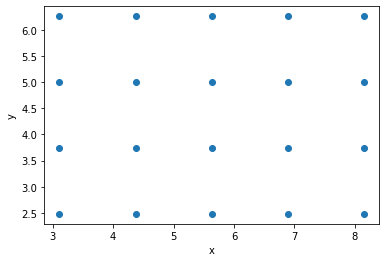

In [82]:
# Atoms are arranged initially in a square lattice 
# configuration with spacing between neighbors equal 
# to equilibrium separation.

equilib_sep = math.pow(2.,1./3.)  ## Equilibrium separation of atoms
wall_spacing_x = (L-(number_x-1)*equilib_sep)/2.## Distance between the walls and the initial array of atoms.
wall_spacing_y = (L-(number_y-1)*equilib_sep)/2.
# Entire L is divided into 2 wall seperation and Sum of distance b/w atoms along x or y
poslist = []  # List for positions of atoms
vlist = []   # List for velocities

################  Initialize positions and velocities ##############################################
x, y = wall_spacing_x, wall_spacing_y

for i in range(number_x):
    for j in range(number_y):
        xi, yi = x + equilib_sep*j, y + equilib_sep*i
        poslist.append((xi,yi))

####### Initially, all particles have the same speed but random velocity directions. ################
v0 = Speed_list #speed of particles calculated in previous cell

for i in range(Natoms):
    phi = 2*np.pi*np.random.random()
    vx = v0[i]*np.cos(phi)
    vy = v0[i]*np.sin(phi)
    vlist.append((vx,vy))
###################################################################################################

pos = np.array(poslist)  ### Converts lists to numpy arrays
pos_initial=np.copy(pos)
v = np.array(vlist) ## Scaled velocity
V_cm = np.sum(v, axis = 0)/Natoms ## Correcting for CM velocity. to make total momentum to be 0
V = np.array([V_cm]*Natoms)
v -= V
v_initial=v.copy()
pos=np.array(pos)
plt.scatter(pos[:,0],pos[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [70]:
time = 0. # Initial time.
t_final = 200. # Time upto which simulation is carried out.
potential_energy = potentialenergy(pos)
kinetic_energy = 0.5*sum(np.square(v).sum(axis=1))
K_initial=kinetic_energy.copy()
energy = kinetic_energy + potential_energy
Time_List = [time]
Energy_List = [energy]
PotentialEnergy_List = [potential_energy]
KineticEnergy_List = [kinetic_energy]
iterations = int(t_final/dt) # Number of iterations of the Verlet Algorithm.
sart = 10 #steps to artificial evolution
nart = 100 # num of artificial evoltuion
T_art = sart * nart # time (divided by dt) for which there's artificial ev (in addition to natural evoltuion)
iterations = int(t_final/dt+T_art) # Number of iterations of the Verlet Algorithm.
t_col = .5 # fraction of final time after which we collect data (after artificial evolution)

In [71]:
##################################### The Verlet Algorithm Loop ###################################
for step in tqdm(range(iterations)):
    pos += v*dt/2. # Updating positions.
    for i in range(Natoms): ## Imposing periodic boundary conditions.
        for j in range(2):
            if pos[i][j] > L: pos[i][j] -= L
            elif pos[i][j] < 0: pos[i][j] += L
    accel = np.zeros((Natoms,2)) ## Initialising acceleration array.
    for i in range(Natoms-1):
        for j in range(i+1,Natoms):
            rij = pos[i] - pos[j]
            for l in range(2):  ### Calculating the correct separation between particles.
                if abs(rij[l])>0.5*L: rij[l] -= L*np.sign(rij[l])
            if np.dot(rij,rij) < rcutsquare:
                acc = acceleration(rij) # Computing acceleration for a pair of particles.
                accel[i] += acc
                accel[j] -= acc
    v += accel*dt  ## Updating velocities.
    pos += v*dt/2. ## Final updating of positions.
    for i in range(Natoms): ## Imposing periodic boundary conditions.
        for j in range(2):
            if pos[i][j] > L: pos[i][j] -= L
            elif pos[i][j] < 0: pos[i][j] += L
    potential_energy = potentialenergy(pos)
    kinetic_energy = 0.5*sum(np.square(v).sum(axis=1))
    energy = kinetic_energy + potential_energy
    Energy_List.append(energy)
    PotentialEnergy_List.append(potential_energy)
    KineticEnergy_List.append(kinetic_energy)
    time += dt
    if (step%sart) == 0 and (step>0) and (step<=sart*nart): # artifical evolution to fix temp
        ksf = (T/T0)*Natoms/kinetic_energy # KE scaling factor
        v *= ksf**.5
    if step == int(T_art+t_col*t_final/dt):
        v_ = np.copy((v[:,0]**2+v[:,1]**2)**.5)

    elif step > int(T_art+t_col*t_final/dt) and (step%10 == 0):
        v_ = np.concatenate((np.copy(v_),np.copy((v[:,0]**2+v[:,1]**2)**.5)))
    Time_List.append(time)

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:18<00:00, 269.01it/s]


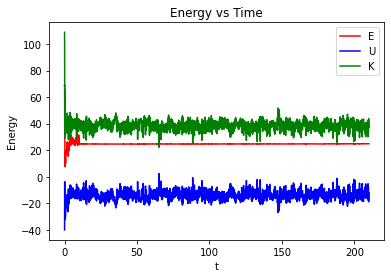

In [72]:
plt.xlabel('t') # Label for the x-axis
plt.ylabel('Energy') # Label for the y-axis
plt.title('Energy vs Time') # Title of plot
plt.plot(Time_List,Energy_List, color = 'r', label="E") 
plt.plot(Time_List,PotentialEnergy_List, color = 'b', label="U")
plt.plot(Time_List,KineticEnergy_List, color = 'g', label="K")
plt.legend();

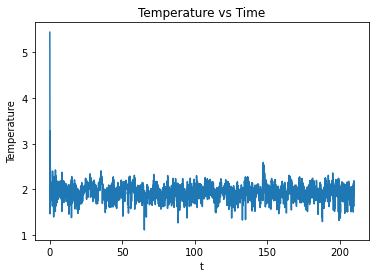

In [73]:
plt.xlabel('t') # Label for the x-axis
plt.ylabel('Temperature') # Label for the y-axis
plt.title('Temperature vs Time') # Title of plot
T_list = np.array(KineticEnergy_List)/Natoms
plt.plot(Time_List,T_list)

## Verifying that speed distribution follows maxwell distribution

In [74]:
def P_v(u,T_):
    return 1/T_ * u * np.exp(-u**2/(2*T_))

Temp = sum(KineticEnergy_List[int(T_art+.25*t_final/dt):-1])/(len(KineticEnergy_List[int(T_art+.25*t_final/dt):-1])*Natoms) # temp established
v_s = np.linspace(min(v_),max(v_),int((max(v_)-min(v_))/.01))
P_vs = P_v(v_s,Temp)

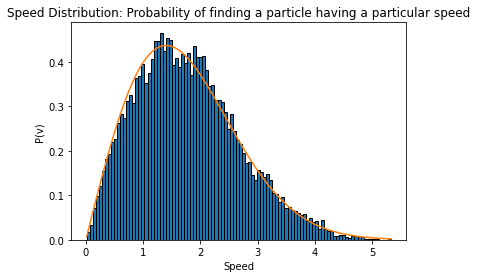

In [81]:
bin_num = 100
bin_width = (max(v_)-min(v_))/bin_num
plt.hist(v_,bins = bin_num,edgecolor="black",density=True,stacked=True)
scaling=0.00095
plt.plot(v_s,scaling*P_vs*(len(v_)*bin_width))
plt.title("Speed Distribution: Probability of finding a particle having a particular speed")
plt.xlabel("Speed")
plt.ylabel("P(v)")
plt.show()